Dataset shape: (52337, 2)
category
POLITICS    35602
BUSINESS     5992
SPORTS       5077
CRIME        3562
TECH         2104
Name: count, dtype: int64

Model Accuracy: 0.8570882690103172

Classification Report:
               precision    recall  f1-score   support

    BUSINESS       0.76      0.57      0.65      1199
       CRIME       0.79      0.65      0.72       712
    POLITICS       0.87      0.97      0.91      7121
      SPORTS       0.90      0.73      0.80      1015
        TECH       0.84      0.50      0.62       421

    accuracy                           0.86     10468
   macro avg       0.83      0.68      0.74     10468
weighted avg       0.85      0.86      0.85     10468



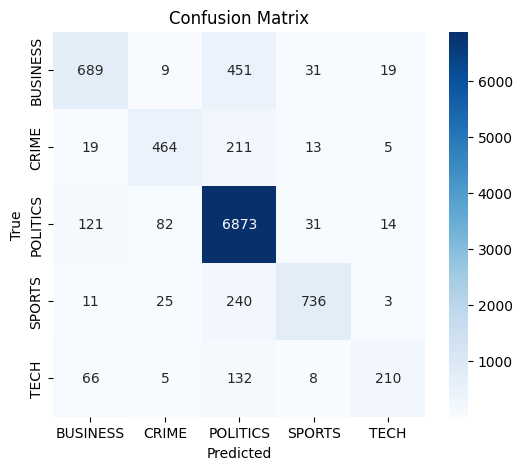


---- News Article Classification ----
Predicted Category: POLITICS
--------------------------------------------------
Predicted Category: POLITICS
--------------------------------------------------
Predicted Category: POLITICS
--------------------------------------------------
Predicted Category: SPORTS
--------------------------------------------------
Predicted Category: POLITICS
--------------------------------------------------
Predicted Category: POLITICS
--------------------------------------------------


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load dataset
df = pd.read_json("D:\\Downloads\\archive\\News_Category_Dataset_v3.json", lines=True)

# Keep only needed columns
df = df[['headline', 'category']]

# Filter only specific categories
categories = ["POLITICS", "SPORTS", "BUSINESS", "TECH", "CRIME"]
df = df[df['category'].isin(categories)]

print("Dataset shape:", df.shape)
print(df['category'].value_counts())


# ---- Step 3: Split Data ----
X = df['headline']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ---- Step 4: Feature Extraction (TF-IDF) ----
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# ---- Step 5: Train Model ----
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


# ---- Step 6: Evaluate ----
y_pred = model.predict(X_test_tfidf)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# ---- Step 7: User Input Prediction ----
print("\n---- News Article Classification ----")
while True:
    user_input = input("Enter a news article (or type 'quit' to exit): ")
    
    if user_input.lower() == "quit":
        print("Exiting...")
        break
    
    # Convert input text to TF-IDF features
    user_tfidf = vectorizer.transform([user_input])
    
    # Predict category
    prediction = model.predict(user_tfidf)[0]
    print("Predicted Category:", prediction)
    print("-" * 50)
